

# Archives Unleashed Hackfest
## November, 30, 2021

![AU HF Poster](AU_Hackfest.png)


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/BrockDSL/ARCH_Data_Explore/blob/main/Hackfest_Kickoff.ipynb)

The goal of this session is to share the Archives Unleashed dataset and some preliminary findings in hope of igniting some ideas.

- The [Project](https://brockdsl.github.io/archives_unleashed/)
- The [Dataset](https://brockdsl.github.io/archives_unleashed/posts/the-dataset/)
- The [Research Questions](https://brockdsl.github.io/archives_unleashed/posts/crisis-communication-theory/)



In [1]:
#Load up required Libraries

import pandas as pd
import random

import matplotlib.pyplot as plt
%matplotlib inline

#Set options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', False)
pd.set_option('display.max_rows', 200)

The following notebook will demonstrate the basics of how to load up some of the extracted derviatives of the dataset from the [Archives Research Compute Hub](https://support.archive-it.org/hc/en-us/articles/360061122492-Introduction-to-the-Archive-It-Research-Services-Cloud) platform.  The **derivatives** that can be generated by ARCH classified in the following categories.


### Collection

- **Domain Frequency** with the columns domain and count

### Network

- **Extract Domain Graph**
- **Extract Image Graph**
- **Extract Web Graph**


### Text

- **Extract plain text of webpages**

### File Formats

- *List of lots of extracted file types*


This demo will focus on *Extracted plain text of webpages* last ran on **October 15, 2021**

Two versions:
- sample - only 75000 lines long (about 10% of total dataset)
- full - This file is 500MB! Best be patient with the download


## Sample Dataset

In [ ]:
# SAMPLE Dataset Download
!curl "https://drive.google.com/file/d/1oLepTvPtcgRxY6G09LDZ59sMQQVgha0f/view?usp=sharing" --output web-pages_sample.csv.gz
!gunzip -k web-pages_sample.csv.gz


In [6]:
# SAMPLE Dataset to DF
extracted_text = pd.read_csv("web-pages_sample.csv")

## Full Dataset

In [ ]:
# FULL Dataset Download

!curl "https://drive.google.com/file/d/16pLY1irJRzmETWnPmnPpQsWp4fvg66Ez/view?usp=sharing" --output web-pages_full.csv.gz
!gunzip -k web-pages_full.csv.gz



In [53]:
# FULL Dataset to DF
extracted_text = pd.read_csv("web-pages_full.csv")

In [38]:
#Optional
#Creates new sample dataset
#extracted_text.sample(75000).to_csv("web-pages_sample.csv",index=False)

## ... Continue with this next cell...

In [54]:
#Clean up some columns
extracted_text['crawl_date']= pd.to_datetime(extracted_text['crawl_date'],format='%Y%m%d')

In [55]:
#Drop pages that weren't captured
extracted_text = extracted_text[extracted_text['language'] =='en']

## Calculate some more columns

In [57]:
#Length of text
for index, row in extracted_text.iterrows():
    extracted_text.at[index,'length'] = int(len(row['content']))

In [58]:
#5 Random Entries
extracted_text.sample(5)

crawl_date              domain  \
338977 2020-11-13  niagararegion.ca     
137310 2020-07-18  discover.brocku.ca   
548322 2021-04-10  discover.brocku.ca   
182419 2020-08-16  discover.brocku.ca   
430477 2021-01-16  discover.brocku.ca   

                                                                                                                                                                                   url  \
338977  https://www.niagararegion.ca/social-media/twitter.aspx?screen_name=NiagaraRegion&include_rts=true&exclude_replies=true&count=5&tweet_mode=extended&api=/statuses/user_timeline   
137310  https://discover.brocku.ca/event-registration/?regevent_action=register&event_id=242                                                                                             
548322  https://discover.brocku.ca/event-registration/?regevent_action=register&event_id=2481                                                                                            
182419  https://discover.brocku.ca/event-registration/?regevent_action=register&event_id=3500                                                                                            
430477  https://discover.brocku.ca/event-registration/?regevent_action=register&event_id=6158                                                                                            

       mime_type_web_server mime_type_tika language  \
338977  text/html            text/plain     en        
137310  text/html            text/html      en        
548322  text/html            text/html      en        
182419  text/html            text/html      en        
430477  text/html            text/html      en        

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

## Domain Analysis and Leads

In [59]:
#Domains in dataset
extracted_text['domain'].value_counts()[0:50]

discover.brocku.ca              195595
gncc.ca                         43862 
youtube.com                     41789 
twitter.com                     30547 
portcolborne.ca                 24869 
gobadgers.ca                    18029 
niagaraanglican.ca              16967 
stcatharinesstandard.ca         12213 
niagarahealth.on.ca             12193 
pelhamlibrary.on.ca             10973 
notl.com                        10652 
niagararegion.ca                10165 
exhibits.library.brocku.ca      9118  
thehopecentre.net               8428  
accounts.google.com             7941  
brocku.ca                       7495  
niagarafallsreview.ca           7296  
pinterest.com                   6802  
niagaracollege.ca               5567  
tripadvisor.ca                  5456  
eventbrite.ca                   5272  
cbc.ca                          4708  
wainfleet.ca                    3520  
niagarathisweek.com             3206  
thorold.ca                      2495  
covid-19.zoomprospector.c

### Domain specific analysis

In [60]:
#Details about specific DOMAIN (randomly choosen)
DOMAIN = random.choice(extracted_text['domain'].unique())

#OR specify it exactly
#DOMAIN = "forterie.niagaraevergreen.ca"


print("Analysis for",DOMAIN)


domain_data = extracted_text[extracted_text["domain"] == DOMAIN]

domain_data.groupby(["crawl_date"]).count()

Analysis for gh.bmj.com


,domain,url,mime_type_web_server,mime_type_tika,language,content,length
crawl_date,,,,,,,
2021-07-09,1,1,1,1,1,1,1
2021-07-16,1,1,1,1,1,1,1


## URL Analysis and leads

### URL specific analysis

In [61]:
#Details about specific URL (randomly choosen)
random_entry = random.randint(1, len(extracted_text))
URL = extracted_text.loc[random_entry]['url']

# OR specify it exactly
#URL = "https://www.canada.ca/en/public-health/services/diseases/2019-novel-coronavirus-infection/latest-travel-health-advice.html" 

print("Analysis for ",URL)

url_data = extracted_text[extracted_text['url'] == URL]
url_data.groupby(["crawl_date"]).count()

Analysis for  https://discover.brocku.ca/event-registration/?regevent_action=register&event_id=1474


,domain,url,mime_type_web_server,mime_type_tika,language,content,length
crawl_date,,,,,,,
2020-04-09,1,1,1,1,1,1,1
2020-04-18,1,1,1,1,1,1,1
2020-04-25,1,1,1,1,1,1,1
2020-05-23,1,1,1,1,1,1,1
2020-05-30,1,1,1,1,1,1,1
2020-05-31,1,1,1,1,1,1,1
2020-06-06,1,1,1,1,1,1,1
2020-06-13,1,1,1,1,1,1,1
2020-06-20,1,1,1,1,1,1,1


/Users/tim/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/tim/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/tim/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


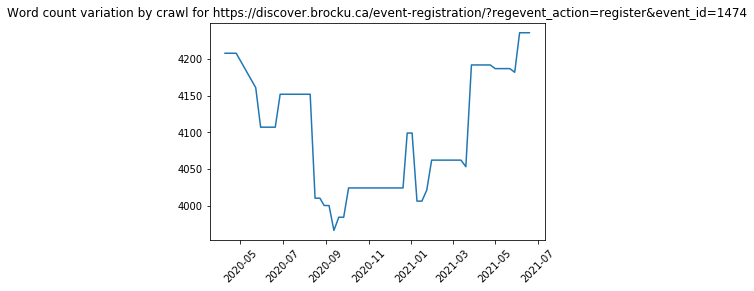

On internet archive:  https://web.archive.org/web/*/https://discover.brocku.ca/event-registration/?regevent_action=register&event_id=1474


In [62]:

plt.plot(url_data['crawl_date'],url_data['length'])
plt.xticks(rotation=45)
plt.title("Word count variation by crawl for " + URL)
plt.show()
print("On internet archive: ", "https://web.archive.org/web/*/"+URL)